In [70]:
#importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

# setting up plot style 
plt.style.use('seaborn-poster')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)


In [2]:
#import dataset

df = pd.read_csv('satisfaction.csv')
df.drop(columns = 'not_defined', inplace = True)
df.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,review_score,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,sao paulo,SP,4.0,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,0.0,1.0,0.0,2.0
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,barreiras,BA,4.0,118.70,22.76,perfumaria,29.0,178.0,1.0,1.0,0.0,0.0,0.0
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,vianopolis,GO,5.0,159.90,19.22,automotivo,46.0,232.0,1.0,0.0,3.0,0.0,0.0
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,sao goncalo do amarante,RN,5.0,45.00,27.20,pet_shop,59.0,468.0,3.0,0.0,1.0,0.0,0.0
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,santo andre,SP,5.0,19.90,8.72,papelaria,38.0,316.0,4.0,0.0,1.0,0.0,0.0


In [3]:
#df = df[['review_score','price', 'freight_value','boleto', 'credit_card', 'debit_card']]


In [4]:
#retirando as colunas product_name_lenght e product_description_lenght

#df.drop(columns = ['product_name_lenght', 'product_description_lenght',
#                   'order_purchase_timestamp',
#                   'order_approved_at',
#                   'order_delivered_carrier_date',
#                   'order_delivered_customer_date',
#                   'order_estimated_delivery_date',
#                   'voucher',
#                   'customer_city',
#                   'customer_state'],
#        inplace = True)
df.columns

Index(['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_city', 'customer_state', 'review_score', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'boleto', 'credit_card', 'debit_card', 'voucher'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92309 entries, 0 to 92308
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_purchase_timestamp       92309 non-null  object 
 1   order_approved_at              92309 non-null  object 
 2   order_delivered_carrier_date   92309 non-null  object 
 3   order_delivered_customer_date  92309 non-null  object 
 4   order_estimated_delivery_date  92309 non-null  object 
 5   customer_city                  92309 non-null  object 
 6   customer_state                 92309 non-null  object 
 7   review_score                   92309 non-null  float64
 8   price                          92309 non-null  float64
 9   freight_value                  92309 non-null  float64
 10  product_category_name          92309 non-null  object 
 11  product_name_lenght            92309 non-null  float64
 12  product_description_lenght     92309 non-null 

# Feature Engineering

## Date Columns

Add columns that are the difference between `order purchase` and anothers date columns

In [6]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

In [7]:
df['diff_approved'] = df['order_approved_at'] - df['order_purchase_timestamp'] #diff data aprovação da compra - data da compra
df['diff_carrier'] = df['order_delivered_carrier_date'] - df['order_purchase_timestamp']
df['diff_customer'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['diff_estimate'] = df['order_estimated_delivery_date'] - df['order_purchase_timestamp']
df['diff_est_del'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']

#transforming the values in days difference
df['diff_approved']=df['diff_approved']/np.timedelta64(1,'D')
df['diff_carrier']=df['diff_carrier']/np.timedelta64(1,'D')
df['diff_customer']=df['diff_customer']/np.timedelta64(1,'D')
df['diff_estimate']=df['diff_estimate']/np.timedelta64(1,'D')
df['diff_est_del']=df['diff_est_del']/np.timedelta64(1,'D')

df.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,review_score,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,4.0,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,0.0,1.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,barreiras,BA,4.0,118.70,22.76,perfumaria,29.0,178.0,1.0,1.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,vianopolis,GO,5.0,159.90,19.22,automotivo,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,sao goncalo do amarante,RN,5.0,45.00,27.20,pet_shop,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,santo andre,SP,5.0,19.90,8.72,papelaria,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171


In [8]:
#drop date columns
cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date']

df.drop(columns = cols, axis= 1, inplace = True)
df.head()

,customer_city,customer_state,review_score,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del
0,sao paulo,SP,4.0,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,0.0,1.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488
1,barreiras,BA,4.0,118.70,22.76,perfumaria,29.0,178.0,1.0,1.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729
2,vianopolis,GO,5.0,159.90,19.22,automotivo,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498
3,sao goncalo do amarante,RN,5.0,45.00,27.20,pet_shop,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069
4,santo andre,SP,5.0,19.90,8.72,papelaria,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92309 entries, 0 to 92308
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_city               92309 non-null  object 
 1   customer_state              92309 non-null  object 
 2   review_score                92309 non-null  float64
 3   price                       92309 non-null  float64
 4   freight_value               92309 non-null  float64
 5   product_category_name       92309 non-null  object 
 6   product_name_lenght         92309 non-null  float64
 7   product_description_lenght  92309 non-null  float64
 8   product_photos_qty          92309 non-null  float64
 9   boleto                      92309 non-null  float64
 10  credit_card                 92309 non-null  float64
 11  debit_card                  92309 non-null  float64
 12  voucher                     92309 non-null  float64
 13  diff_approved               923

## Customer city columns

In [10]:
df['customer_city'].value_counts()

sao paulo                 14545
rio de janeiro             6338
belo horizonte             2571
brasilia                   1998
curitiba                   1414
                          ...  
santo antonio do canaa        1
lamarao                       1
aparecida do rio negro        1
joaquim pires                 1
cambira                       1
Name: customer_city, Length: 3990, dtype: int64

In [11]:
#list of capitals:

capitals = ["rio branco",
"maceio",
"macapa",
"manaus",
"salvador",
"fortaleza",
"brasilia",
"vitria",
"goiania",
"sao luis",
"cuiaba",
"campo grande",
"belo horizonte",
"belem",
"joao pessoa",
"curitiba",
"recife",
"teresina",
"rio de janeiro",
"natal",
"porto alegre",
"porto velho",
"boa vista",
"florianopolis",
"sao paulo",
"aracaju",
"palmas" ]

In [12]:
#create a new column based capitals list
def cap (row):
    if row['customer_city'] in capitals:
        val = 1
    else:
        val = 0
    return val

In [13]:
df['customer_capital'] = df.apply(cap, axis = 1)
df.head()

,customer_city,customer_state,review_score,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital
0,sao paulo,SP,4.0,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,0.0,1.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1
1,barreiras,BA,4.0,118.70,22.76,perfumaria,29.0,178.0,1.0,1.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0
2,vianopolis,GO,5.0,159.90,19.22,automotivo,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0
3,sao goncalo do amarante,RN,5.0,45.00,27.20,pet_shop,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0
4,santo andre,SP,5.0,19.90,8.72,papelaria,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0


In [14]:
#drop the city column
df.drop(columns = 'customer_city', axis = 1, inplace = True)
df.head()

,customer_state,review_score,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital
0,SP,4.0,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,0.0,1.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1
1,BA,4.0,118.70,22.76,perfumaria,29.0,178.0,1.0,1.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0
2,GO,5.0,159.90,19.22,automotivo,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0
3,RN,5.0,45.00,27.20,pet_shop,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0
4,SP,5.0,19.90,8.72,papelaria,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0


## Customer State

In [15]:
df.customer_state.value_counts()

SP    38964
RJ    11812
MG    10856
RS     5123
PR     4708
SC     3351
BA     3048
DF     2006
ES     1891
GO     1868
PE     1514
CE     1190
PA      889
MT      857
MS      681
MA      676
PB      485
RN      455
PI      446
AL      379
SE      312
TO      260
RO      227
AM      143
AC       73
AP       61
RR       34
Name: customer_state, dtype: int64

In [16]:
#create a regions list
norte = ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
nordeste = ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
centro_oeste = ['MT', 'MS', 'GO']
sul = ['PR', 'RS', 'SC']
sudeste = ['SP', 'RJ', 'ES', 'MG']

In [17]:
#create a new feature based in region list
def region (row):
    val = ""
    if row['customer_state'] in norte:
        val = 'norte'
    elif row['customer_state'] in nordeste:
        val = 'nordeste'
    elif row['customer_state'] in centro_oeste:
        val = 'centro_oeste'
    elif row['customer_state'] in sul:
        val = 'sul'
    elif row['customer_state'] in sudeste:
        val = 'sudeste'
    return val

In [18]:
df['customer_region'] = df.apply(region, axis = 1)

In [19]:
#drop the customer_state colum
df.drop(columns = 'customer_state', axis = 1, inplace = True)
df.head()

,review_score,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital,customer_region
0,4.0,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,0.0,1.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1,sudeste
1,4.0,118.70,22.76,perfumaria,29.0,178.0,1.0,1.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0,nordeste
2,5.0,159.90,19.22,automotivo,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0,centro_oeste
3,5.0,45.00,27.20,pet_shop,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0,nordeste
4,5.0,19.90,8.72,papelaria,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0,sudeste


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92309 entries, 0 to 92308
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   review_score                92309 non-null  float64
 1   price                       92309 non-null  float64
 2   freight_value               92309 non-null  float64
 3   product_category_name       92309 non-null  object 
 4   product_name_lenght         92309 non-null  float64
 5   product_description_lenght  92309 non-null  float64
 6   product_photos_qty          92309 non-null  float64
 7   boleto                      92309 non-null  float64
 8   credit_card                 92309 non-null  float64
 9   debit_card                  92309 non-null  float64
 10  voucher                     92309 non-null  float64
 11  diff_approved               92309 non-null  float64
 12  diff_carrier                92309 non-null  float64
 13  diff_customer               923

## Product category

In [21]:
product_percent = df['product_category_name'].value_counts(normalize=True) * 100

In [22]:
products = product_percent[product_percent < 0.5]
products = products.index.tolist()
products

['casa_construcao',
 'alimentos',
 'moveis_sala',
 'casa_conforto',
 'audio',
 'bebidas',
 'livros_tecnicos',
 'market_place',
 'fashion_calcados',
 'climatizacao',
 'construcao_ferramentas_iluminacao',
 'industria_comercio_e_negocios',
 'moveis_cozinha_area_de_servico_jantar_e_jardim',
 'eletrodomesticos_2',
 'alimentos_bebidas',
 'construcao_ferramentas_jardim',
 'telefonia_fixa',
 'artes',
 'pcs',
 'agro_industria_e_comercio',
 'construcao_ferramentas_seguranca',
 'sinalizacao_e_seguranca',
 'artigos_de_natal',
 'fashion_underwear_e_moda_praia',
 'fashion_roupa_masculina',
 'construcao_ferramentas_ferramentas',
 'moveis_quarto',
 'tablets_impressao_imagem',
 'portateis_casa_forno_e_cafe',
 'cine_foto',
 'dvds_blu_ray',
 'livros_importados',
 'moveis_colchao_e_estofado',
 'artigos_de_festas',
 'musica',
 'fashion_roupa_feminina',
 'flores',
 'fashion_esporte',
 'casa_conforto_2',
 'fraldas_higiene',
 'artes_e_artesanato',
 'la_cuisine',
 'cds_dvds_musicais',
 'portateis_cozinha_e_pre

In [23]:
df = df[~df.product_category_name.isin(products)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85769 entries, 0 to 92308
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   review_score                85769 non-null  float64
 1   price                       85769 non-null  float64
 2   freight_value               85769 non-null  float64
 3   product_category_name       85769 non-null  object 
 4   product_name_lenght         85769 non-null  float64
 5   product_description_lenght  85769 non-null  float64
 6   product_photos_qty          85769 non-null  float64
 7   boleto                      85769 non-null  float64
 8   credit_card                 85769 non-null  float64
 9   debit_card                  85769 non-null  float64
 10  voucher                     85769 non-null  float64
 11  diff_approved               85769 non-null  float64
 12  diff_carrier                85769 non-null  float64
 13  diff_customer               857

In [24]:
df.product_category_name.value_counts()

cama_mesa_banho                      9116
beleza_saude                         8188
esporte_lazer                        7147
informatica_acessorios               6220
moveis_decoracao                     6090
utilidades_domesticas                5393
relogios_presentes                   5179
telefonia                            3758
automotivo                           3621
brinquedos                           3606
cool_stuff                           3298
ferramentas_jardim                   3259
perfumaria                           2963
bebes                                2616
eletronicos                          2331
papelaria                            2186
fashion_bolsas_e_acessorios          1789
pet_shop                             1624
no info                              1323
moveis_escritorio                    1103
malas_acessorios                      966
consoles_games                        926
eletrodomesticos                      721
construcao_ferramentas_construcao 

# Transforming Categorical Values

### Encoding Independent variables

In [25]:
# Get list of categorical variables
datatype = df.dtypes
object_cols = datatype[(datatype == 'object') | (datatype == 'category')].index.tolist()
#object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['product_category_name', 'customer_region']


In [26]:
df.columns

Index(['review_score', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'boleto', 'credit_card', 'debit_card', 'voucher', 'diff_approved', 'diff_carrier', 'diff_customer', 'diff_estimate', 'diff_est_del', 'customer_capital', 'customer_region'], dtype='object')

In [27]:
#get dummies
dummy = pd.get_dummies(df[['product_category_name']], drop_first=True)

#concat dataframe
df = pd.concat([df, dummy], axis = 1)

#drop the columns:
df.drop(columns = object_cols, axis= 1, inplace = True)

#check
df.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_cool_stuff,product_category_name_eletrodomesticos,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_ferramentas_jardim,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_livros_interesse_geral,product_category_name_malas_acessorios,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_no info,product_category_name_papelaria,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas
0,4.0,29.99,8.72,40.0,268.0,4.0,0.0,1.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4.0,118.70,22.76,29.0,178.0,1.0,1.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,5.0,159.90,19.22,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.0,45.00,27.20,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5.0,19.90,8.72,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85769 entries, 0 to 92308
Data columns (total 42 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   review_score                                             85769 non-null  float64
 1   price                                                    85769 non-null  float64
 2   freight_value                                            85769 non-null  float64
 3   product_name_lenght                                      85769 non-null  float64
 4   product_description_lenght                               85769 non-null  float64
 5   product_photos_qty                                       85769 non-null  float64
 6   boleto                                                   85769 non-null  float64
 7   credit_card                                              85769 non-null  float64
 8   debit_card                

# Model

In [29]:
scaler = StandardScaler()

X_scale = scaler.fit_transform(df)


df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_cool_stuff,product_category_name_eletrodomesticos,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_ferramentas_jardim,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_livros_interesse_geral,product_category_name_malas_acessorios,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_no info,product_category_name_papelaria,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas
0,-0.160247,-0.529493,-0.680079,-0.707244,-0.774464,1.047218,-0.494331,-0.594816,-0.124589,4.712133,-0.493308,-0.227785,-0.413925,-0.939785,-0.419615,1.296935,-0.17737,-0.324871,-0.209496,-0.344856,-0.104471,-0.09045,-0.199975,-0.092074,-0.167143,-0.08237,-0.301502,-0.145954,-0.198742,-0.279626,-0.082298,-0.076189,-0.106729,-0.276463,-0.114139,-0.125167,-0.161721,-0.189162,-0.138925,-0.253503,-0.214063,3.860539
1,-0.160247,-0.054023,0.063841,-1.657458,-0.914609,-0.686625,2.022934,-0.934513,-0.124589,-0.137978,1.010109,-0.407620,0.147946,-0.528524,-0.591596,-0.771048,-0.17737,-0.324871,-0.209496,-0.344856,-0.104471,-0.09045,-0.199975,-0.092074,-0.167143,-0.08237,-0.301502,-0.145954,-0.198742,-0.279626,-0.082298,-0.076189,-0.106729,-0.276463,-0.114139,-0.125167,-0.161721,5.286462,-0.138925,-0.253503,-0.214063,-0.259031
2,0.588266,0.166801,-0.123728,-0.188946,-0.830522,-0.686625,-0.494331,0.084579,-0.124589,-0.137978,-0.488494,-0.842474,-0.313266,0.329995,0.575692,-0.771048,-0.17737,-0.324871,-0.209496,-0.344856,-0.104471,-0.09045,-0.199975,-0.092074,-0.167143,-0.08237,-0.301502,-0.145954,-0.198742,-0.279626,-0.082298,-0.076189,-0.106729,-0.276463,-0.114139,-0.125167,-0.161721,-0.189162,-0.138925,-0.253503,-0.214063,-0.259031
3,0.588266,-0.449042,0.299098,0.934033,-0.463030,0.469270,-0.494331,-0.594816,-0.124589,-0.137978,-0.487414,0.166562,0.087687,0.278395,0.156930,-0.771048,-0.17737,-0.324871,-0.209496,-0.344856,-0.104471,-0.09045,-0.199975,-0.092074,-0.167143,-0.08237,-0.301502,-0.145954,-0.198742,-0.279626,-0.082298,-0.076189,-0.106729,-0.276463,-0.114139,-0.125167,-0.161721,-0.189162,7.198154,-0.253503,-0.214063,-0.259031
4,0.588266,-0.583573,-0.680079,-0.880010,-0.699720,1.047218,-0.494331,-0.594816,-0.124589,-0.137978,-0.451349,-0.637384,-0.998630,-1.332543,-0.210434,-0.771048,-0.17737,-0.324871,-0.209496,-0.344856,-0.104471,-0.09045,-0.199975,-0.092074,-0.167143,-0.08237,-0.301502,-0.145954,-0.198742,-0.279626,-0.082298,-0.076189,-0.106729,-0.276463,-0.114139,-0.125167,6.183493,-0.189162,-0.138925,-0.253503,-0.214063,-0.259031


------------------------------------

## Applying t-SNE

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 85769 samples in 36.383s...
[t-SNE] Computed neighbors for 85769 samples in 1023.703s...
[t-SNE] Computed conditional probabilities for sample 1000 / 85769
[t-SNE] Computed conditional probabilities for sample 2000 / 85769
[t-SNE] Computed conditional probabilities for sample 3000 / 85769
[t-SNE] Computed conditional probabilities for sample 4000 / 85769
[t-SNE] Computed conditional probabilities for sample 5000 / 85769
[t-SNE] Computed conditional probabilities for sample 6000 / 85769
[t-SNE] Computed conditional probabilities for sample 7000 / 85769
[t-SNE] Computed conditional probabilities for sample 8000 / 85769
[t-SNE] Computed conditional probabilities for sample 9000 / 85769
[t-SNE] Computed conditional probabilities for sample 10000 / 85769
[t-SNE] Computed conditional probabilities for sample 11000 / 85769
[t-SNE] Computed conditional probabilities for sample 12000 / 85769
[t-SNE] Computed conditional probabilities fo

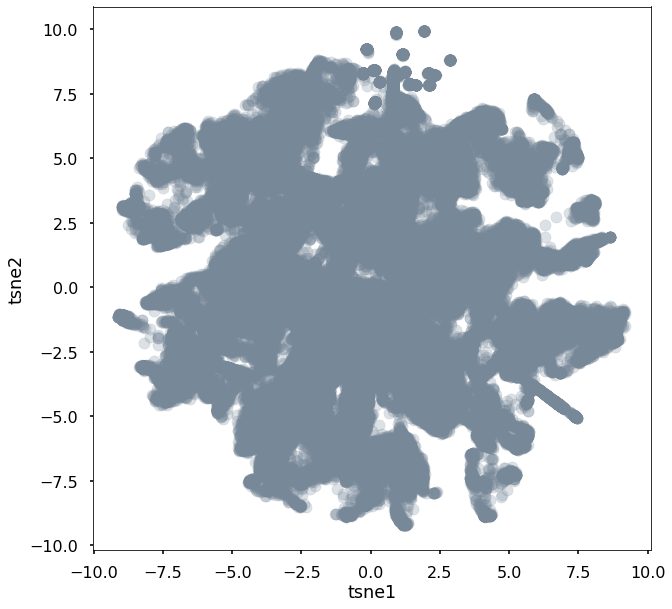

Wall time: 52min 32s


In [30]:
%%time

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=500, learning_rate=100)
tsne_scale_results = tsne.fit_transform(df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [31]:
tsne_df_scale.head()

,tsne1,tsne2,tsne3
0,0.048920,-1.524204,5.048652
1,-1.227718,0.312648,-8.479268
2,-3.637785,-1.503221,1.261525
3,1.430528,0.872189,-7.031322
4,4.256788,0.729027,0.934847


Text(0, 0.5, 'Inertia')

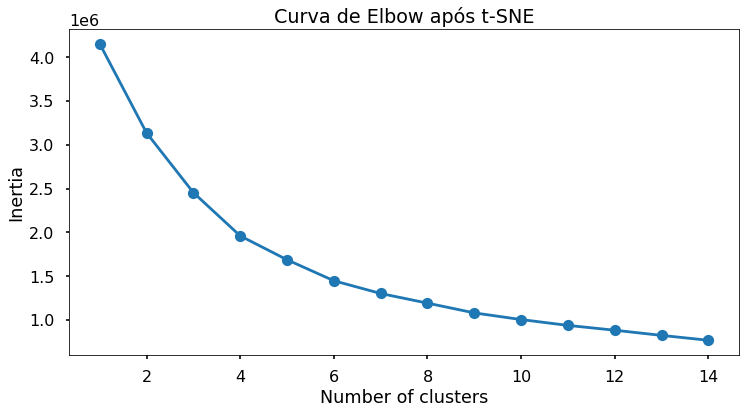

In [32]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scaled)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Curva de Elbow após t-SNE')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [33]:
#applying kmeans in t-SNE

kmeans_tsne_scale = KMeans(n_clusters=5, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)

print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.2571927607059479


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


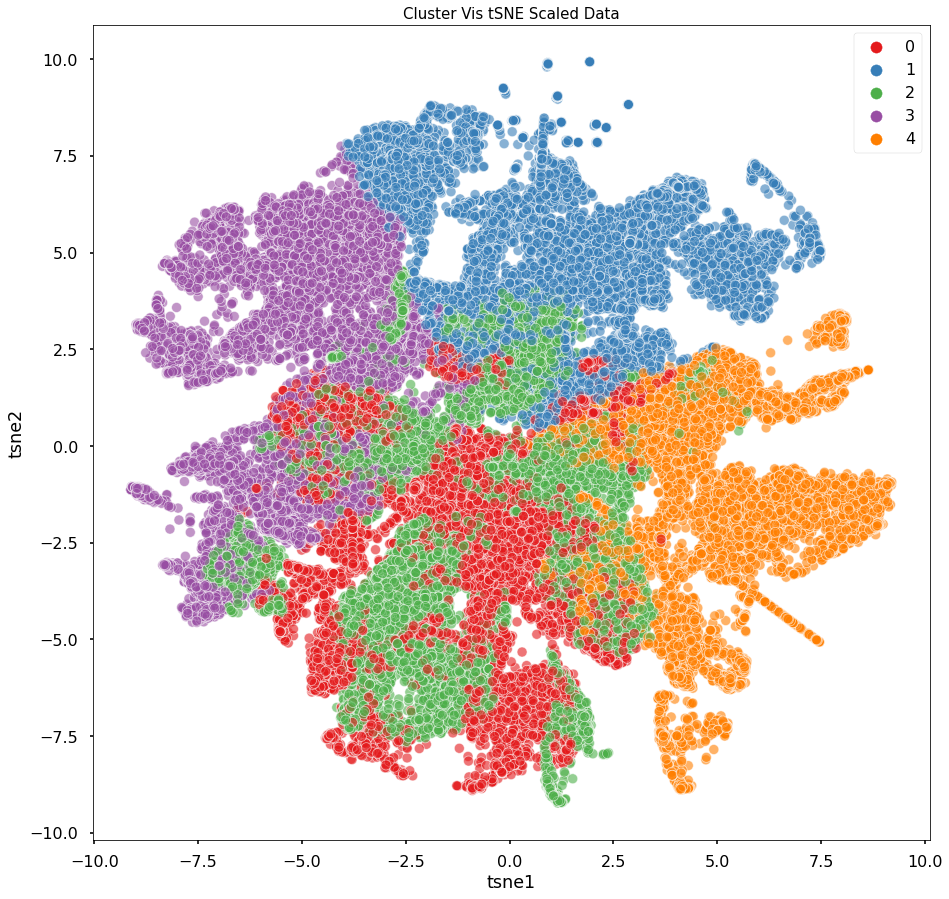

In [34]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [35]:
cluster_tsne_profile = pd.merge(df, clusters_tsne_scale['tsne_clusters'], left_index=True, right_index=True )
cluster_tsne_profile.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_cool_stuff,product_category_name_eletrodomesticos,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_ferramentas_jardim,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_livros_interesse_geral,product_category_name_malas_acessorios,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_no info,product_category_name_papelaria,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas,tsne_clusters
0,4.0,29.99,8.72,40.0,268.0,4.0,0.0,1.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
1,4.0,118.70,22.76,29.0,178.0,1.0,1.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,159.90,19.22,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,5.0,45.00,27.20,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5.0,19.90,8.72,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


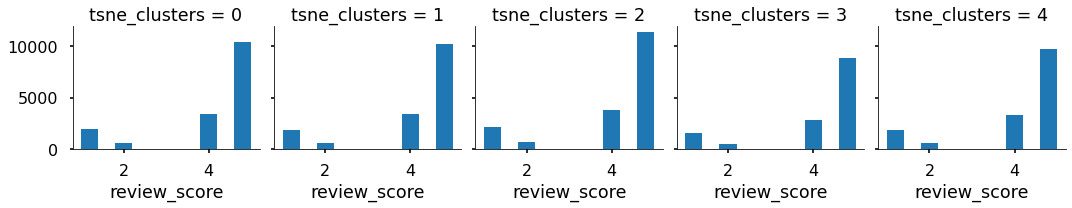

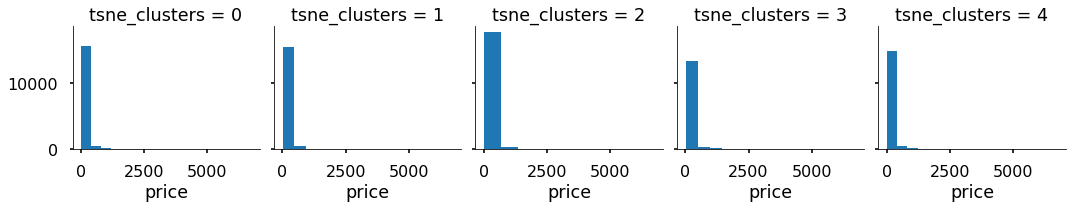

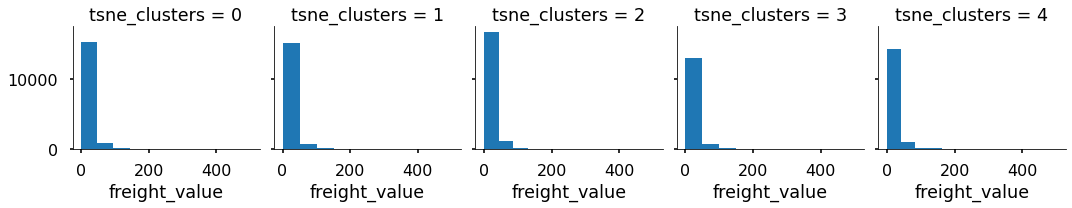

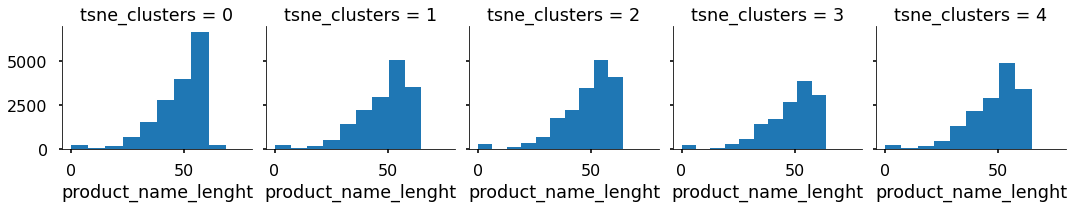

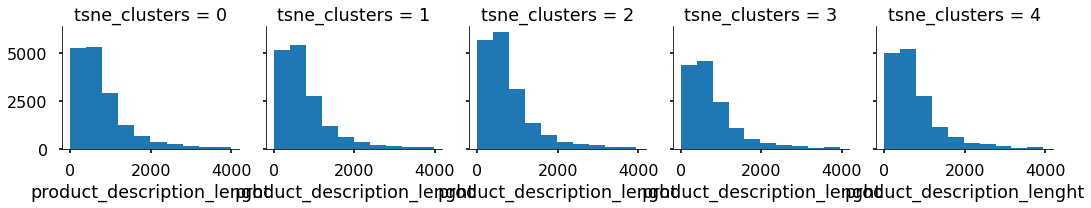

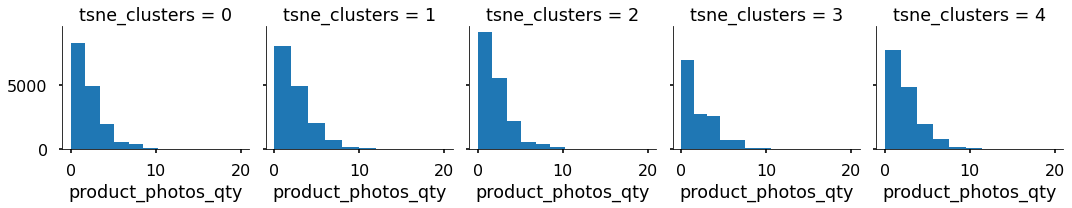

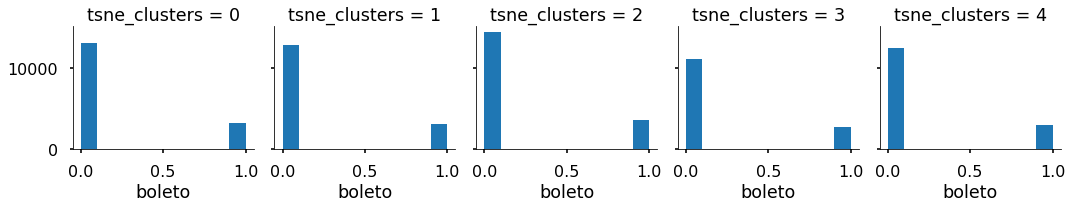

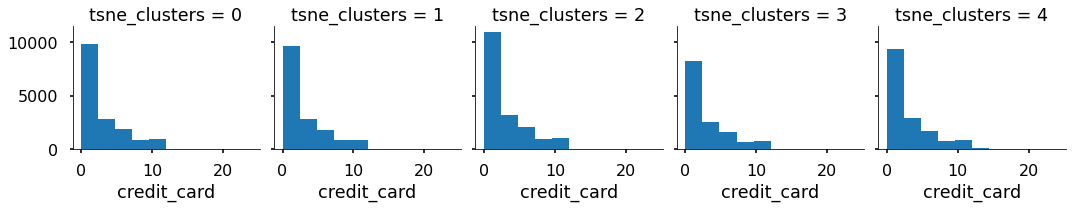

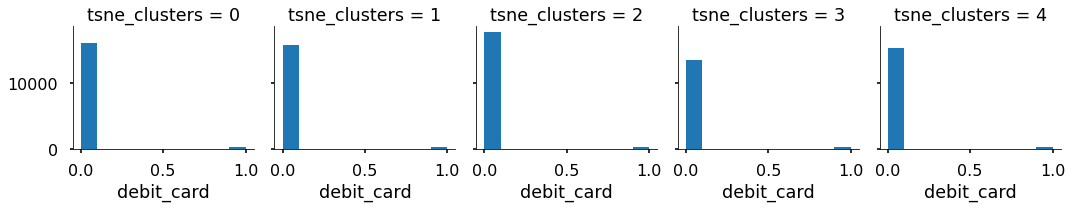

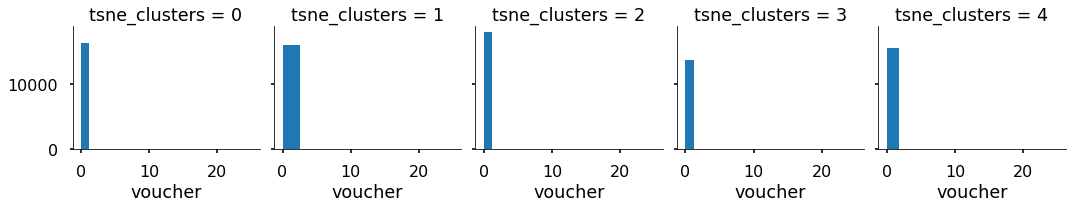

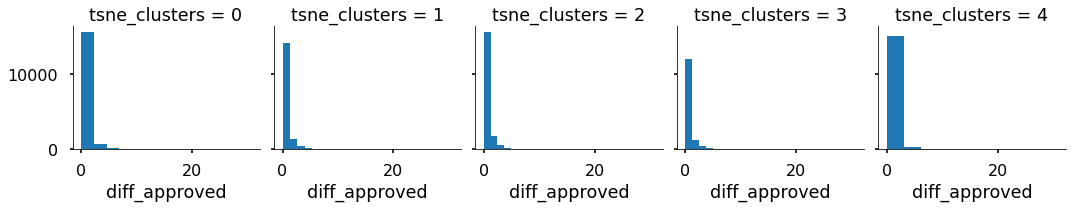

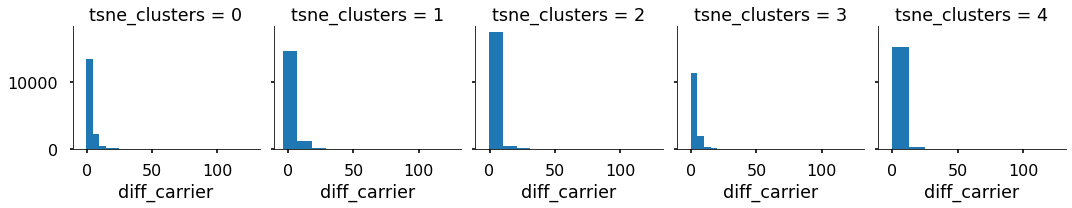

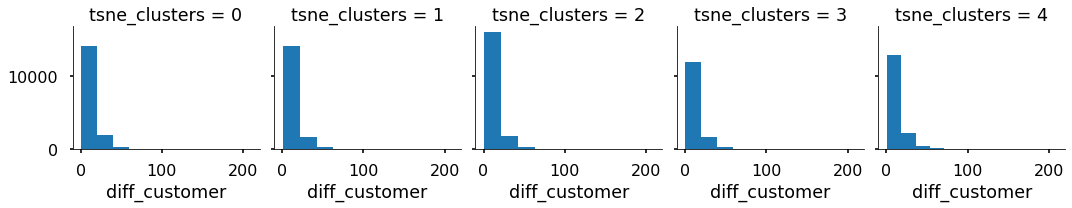

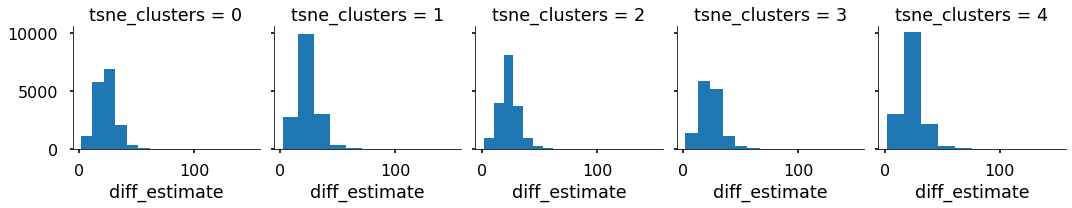

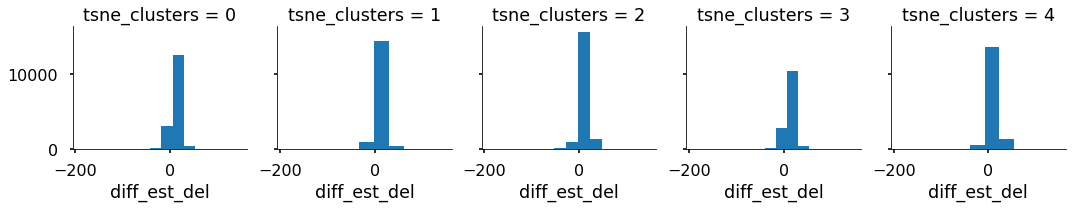

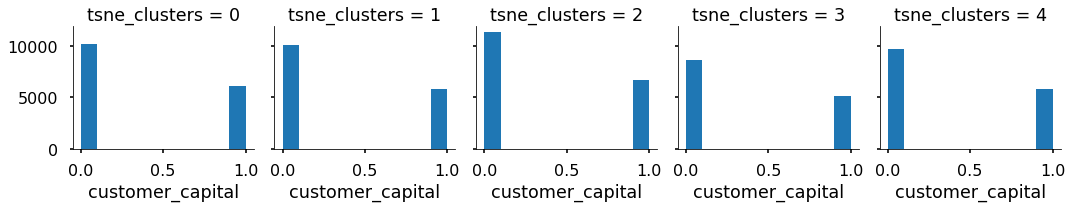

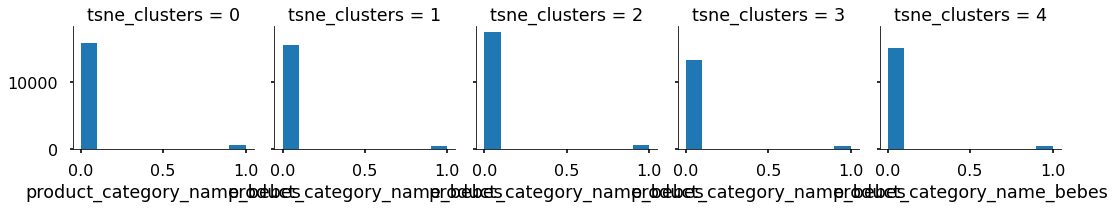

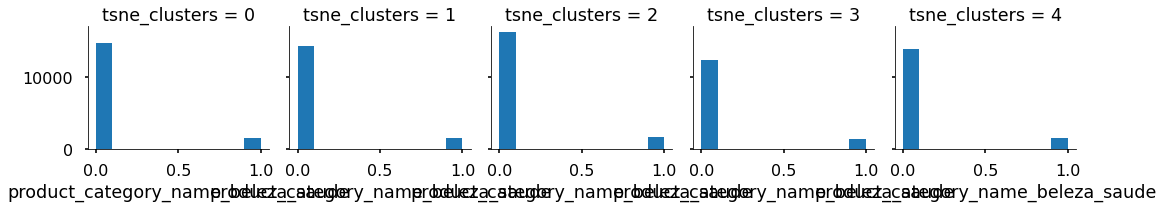

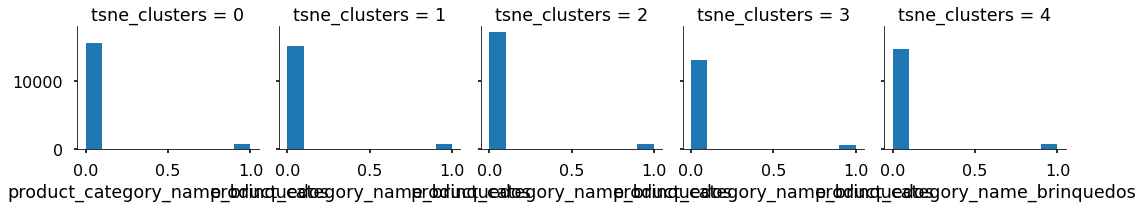

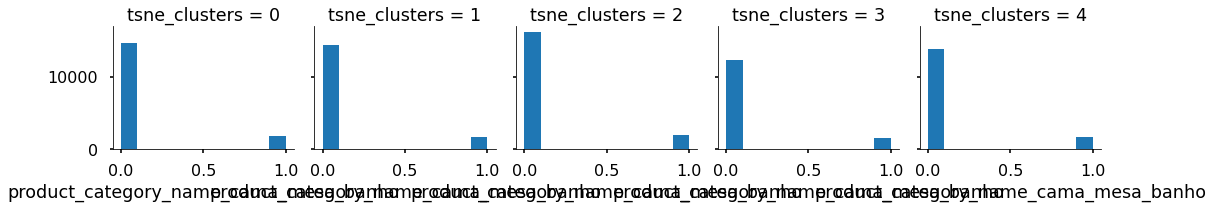

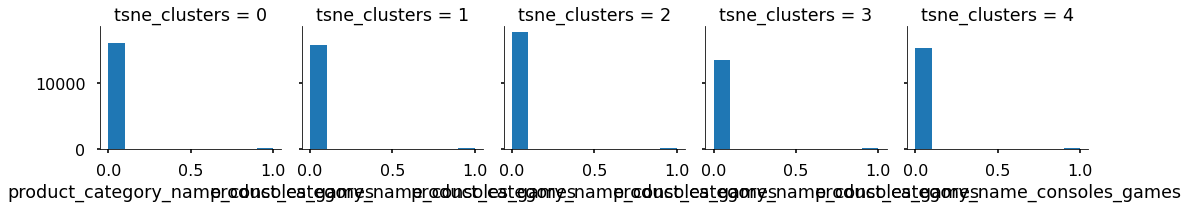

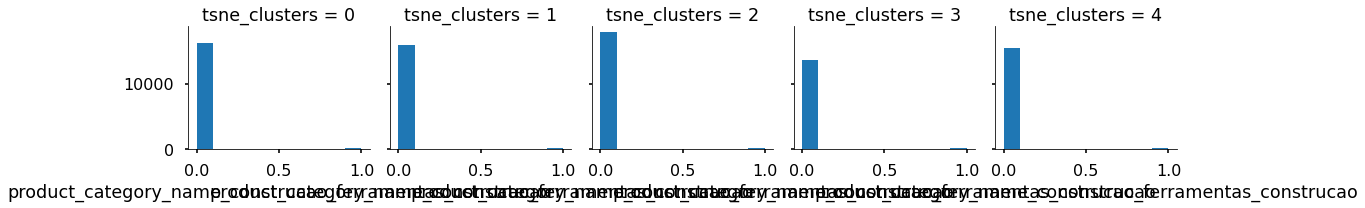

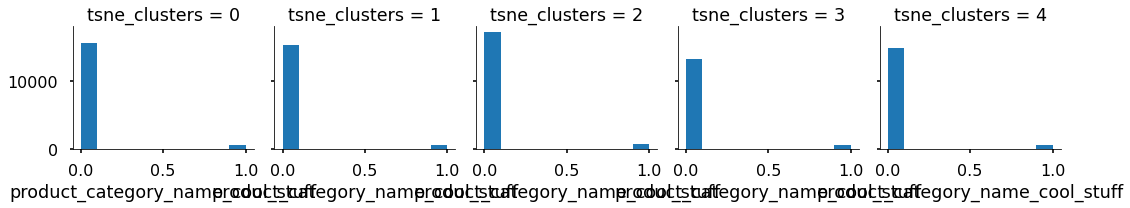

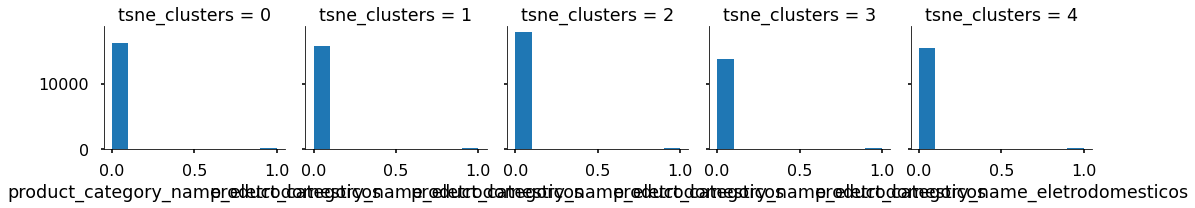

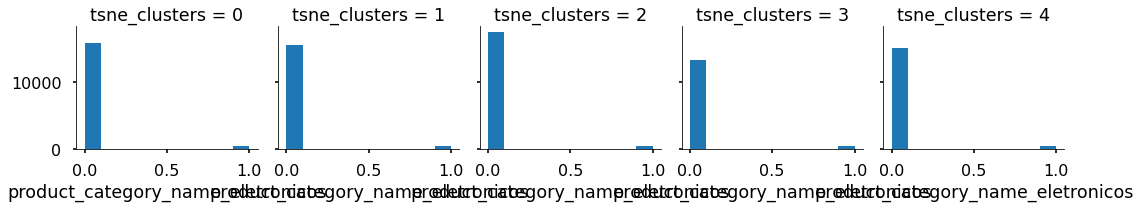

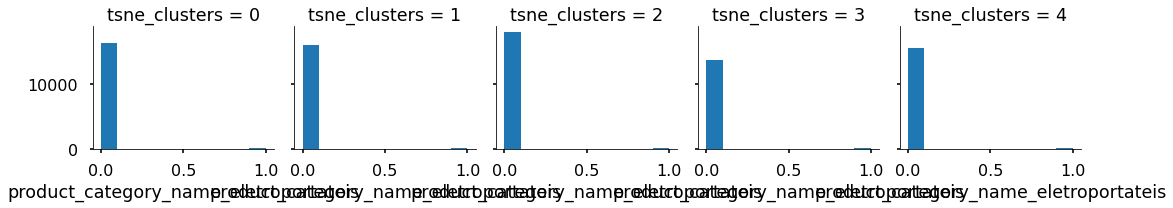

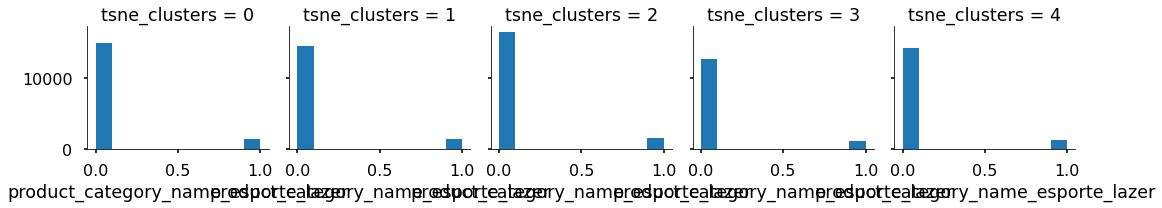

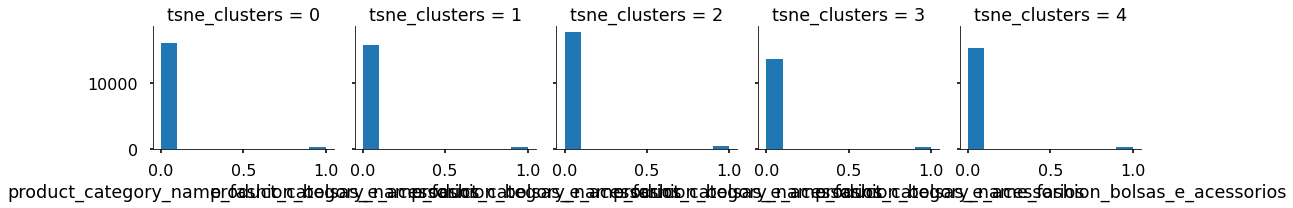

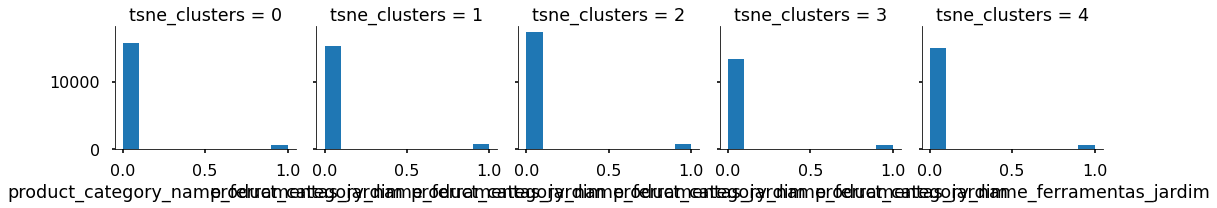

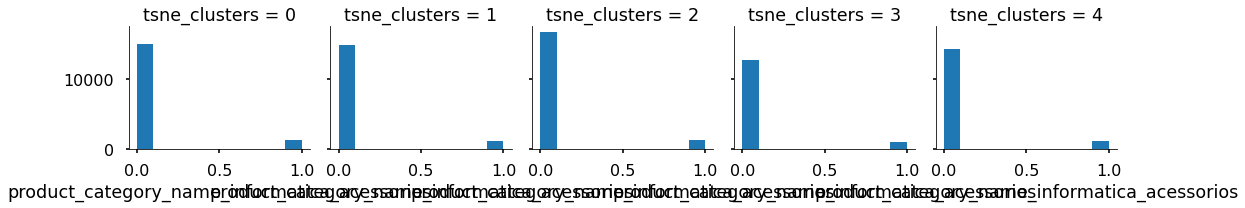

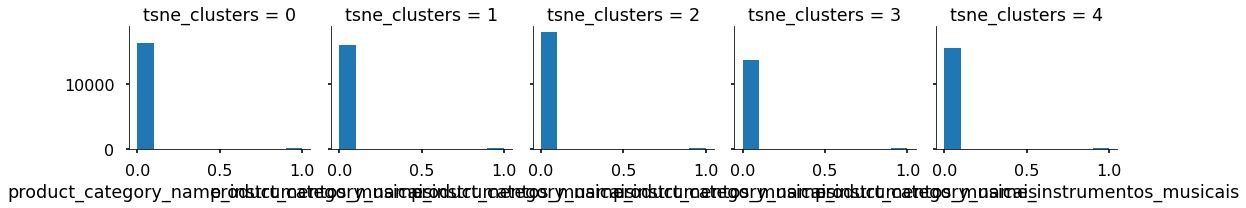

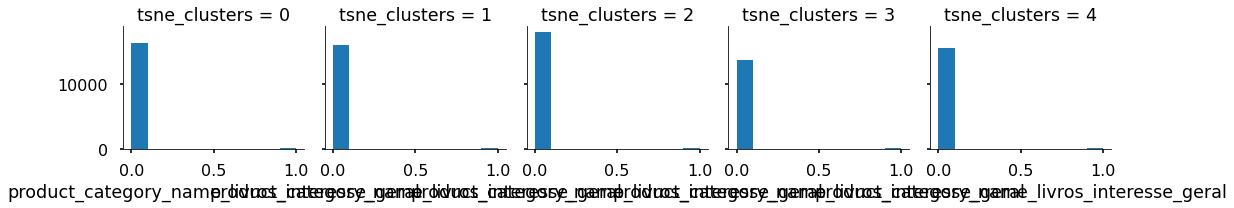

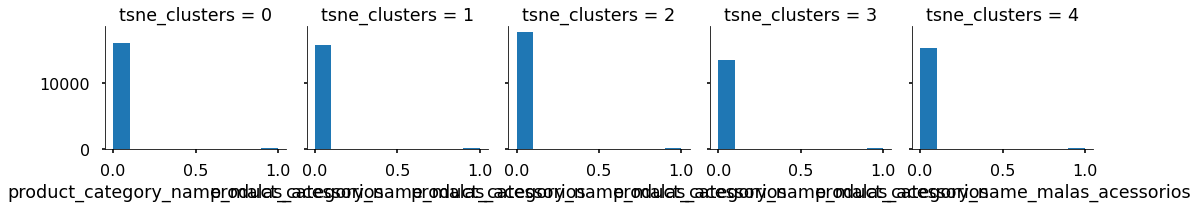

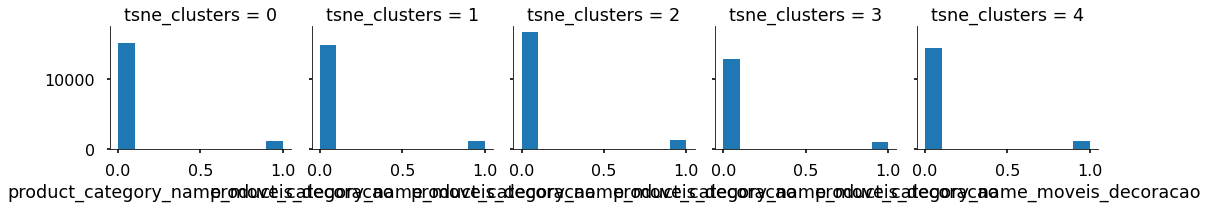

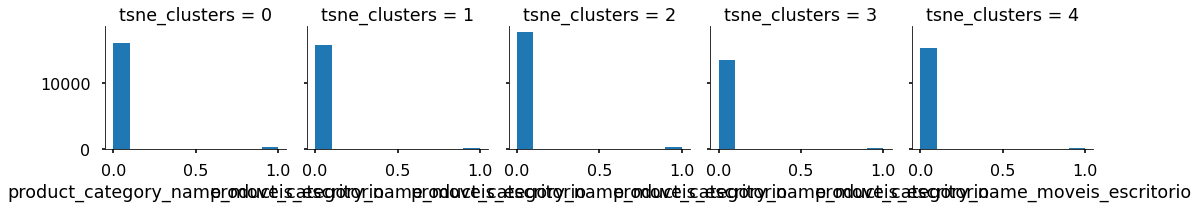

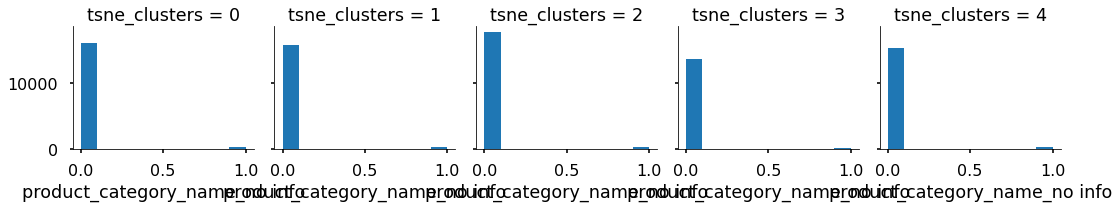

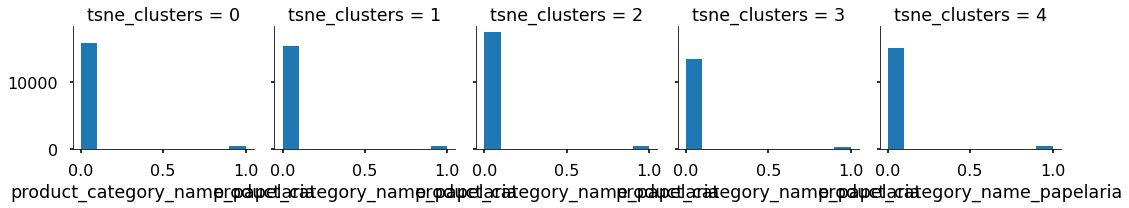

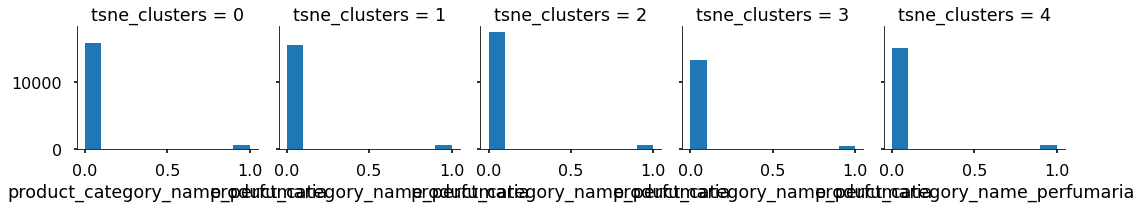

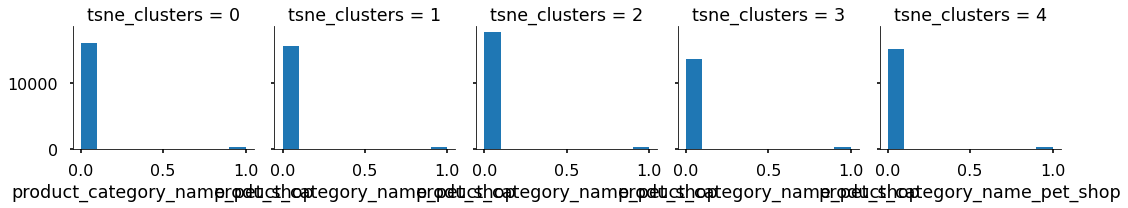

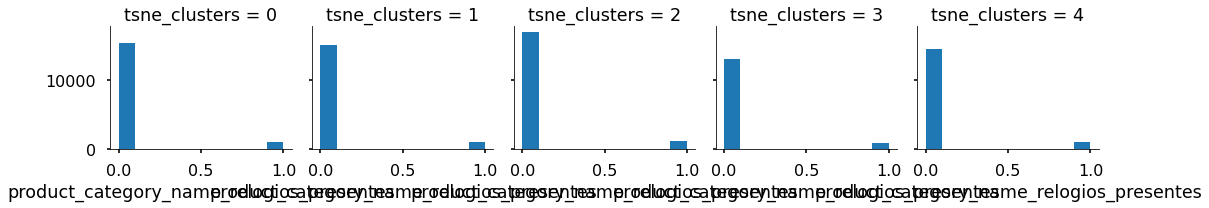

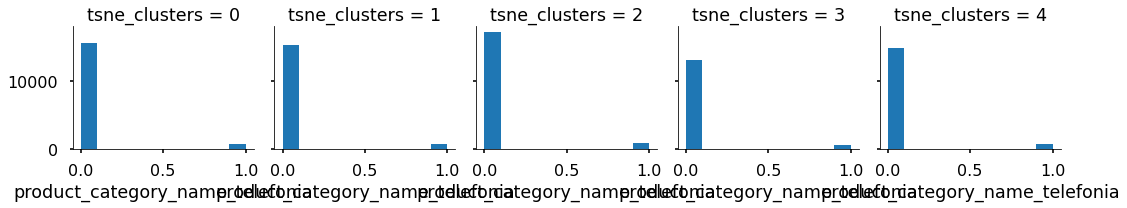

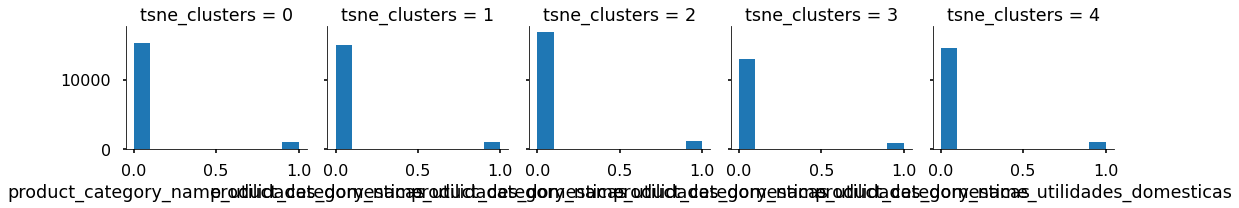

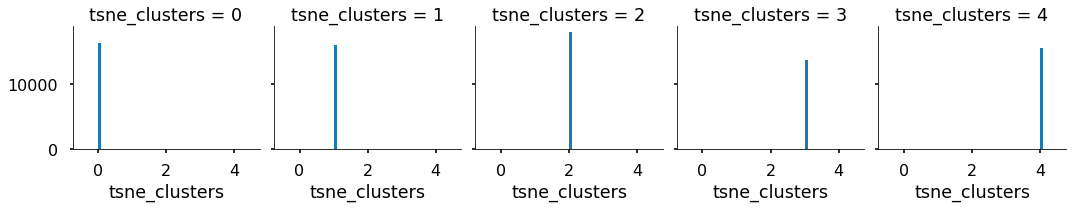

In [36]:
for c in cluster_tsne_profile:
    grid = sns.FacetGrid(cluster_tsne_profile, col='tsne_clusters')
    grid.map(plt.hist, c)

## Clusters EDA

In [37]:
cluster_tsne_profile.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_cool_stuff,product_category_name_eletrodomesticos,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_ferramentas_jardim,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_livros_interesse_geral,product_category_name_malas_acessorios,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_no info,product_category_name_papelaria,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas,tsne_clusters
0,4.0,29.99,8.72,40.0,268.0,4.0,0.0,1.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
1,4.0,118.70,22.76,29.0,178.0,1.0,1.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,159.90,19.22,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,5.0,45.00,27.20,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5.0,19.90,8.72,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4


In [38]:
conditions = [
    cluster_tsne_profile['tsne_clusters'] == 0,
    cluster_tsne_profile['tsne_clusters'] == 1,
    cluster_tsne_profile['tsne_clusters'] == 2,
    cluster_tsne_profile['tsne_clusters'] == 3,
    cluster_tsne_profile['tsne_clusters'] == 4
]

values = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

cluster_tsne_profile['cluster_name'] = np.select(conditions,values)
cluster_tsne_profile.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_cool_stuff,product_category_name_eletrodomesticos,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_ferramentas_jardim,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_livros_interesse_geral,product_category_name_malas_acessorios,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_no info,product_category_name_papelaria,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas,tsne_clusters,cluster_name
0,4.0,29.99,8.72,40.0,268.0,4.0,0.0,1.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,Cluster 3
1,4.0,118.70,22.76,29.0,178.0,1.0,1.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Cluster 1
2,5.0,159.90,19.22,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Cluster 4
3,5.0,45.00,27.20,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Cluster 1
4,5.0,19.90,8.72,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,Cluster 5


In [39]:
cluster_tsne_profile['cluster_name'].value_counts()

Cluster 3    18033
Cluster 1    16346
Cluster 2    15997
Cluster 5    15537
Cluster 4    13811
Name: cluster_name, dtype: int64

In [40]:
cluster_1 = cluster_tsne_profile[cluster_tsne_profile['cluster_name'] == 'Cluster 1']
cluster_2 = cluster_tsne_profile[cluster_tsne_profile['cluster_name'] == 'Cluster 2']
cluster_3 = cluster_tsne_profile[cluster_tsne_profile['cluster_name'] == 'Cluster 3']
cluster_4 = cluster_tsne_profile[cluster_tsne_profile['cluster_name'] == 'Cluster 4']
cluster_5 = cluster_tsne_profile[cluster_tsne_profile['cluster_name'] == 'Cluster 5']

### Reviews

In [41]:
rs_prop_1 = cluster_1['review_score'].value_counts(normalize=True).reset_index().rename(columns = {'review_score': 'percent',
                                                                                                   'index':'review_score'})
rs_prop_1['Cluster'] = 'Cluster 1'

rs_prop_2 = cluster_2['review_score'].value_counts(normalize=True).reset_index().rename(columns = {'review_score': 'percent',
                                                                                                   'index':'review_score'})
rs_prop_2['Cluster'] = 'Cluster 2'

rs_prop_3 = cluster_3['review_score'].value_counts(normalize=True).reset_index().rename(columns = {'review_score': 'percent',
                                                                                                   'index':'review_score'})
rs_prop_3['Cluster'] = 'Cluster 3'

rs_prop_4 = cluster_4['review_score'].value_counts(normalize=True).reset_index().rename(columns = {'review_score': 'percent',
                                                                                                   'index':'review_score'})
rs_prop_4['Cluster'] = 'Cluster 4'

rs_prop_5 = cluster_5['review_score'].value_counts(normalize=True).reset_index().rename(columns = {'review_score': 'percent',
                                                                                                   'index':'review_score'})
rs_prop_5['Cluster'] = 'Cluster 5'

rs_prop = pd.concat([rs_prop_1,rs_prop_2, rs_prop_3, rs_prop_4, rs_prop_5])
rs_prop

,review_score,percent,Cluster
0,5.0,0.641074,Cluster 1
1,4.0,0.208675,Cluster 1
2,1.0,0.115502,Cluster 1
3,2.0,0.034749,Cluster 1
0,5.0,0.637244,Cluster 2
1,4.0,0.212602,Cluster 2
2,1.0,0.115772,Cluster 2
3,2.0,0.034381,Cluster 2
0,5.0,0.631398,Cluster 3
1,4.0,0.212721,Cluster 3


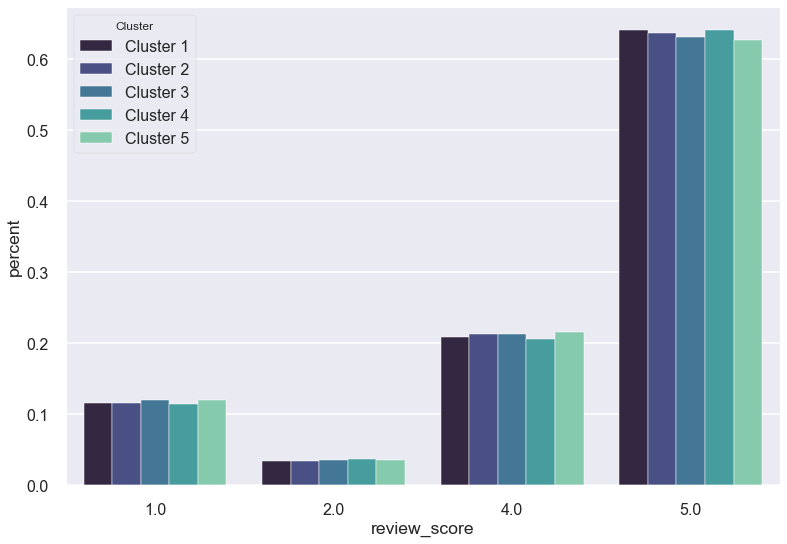

In [75]:
sns.barplot(x='review_score',
            y = 'percent',
            hue = 'Cluster',
            data = rs_prop,
            palette = 'mako')
plt.show()

### Price

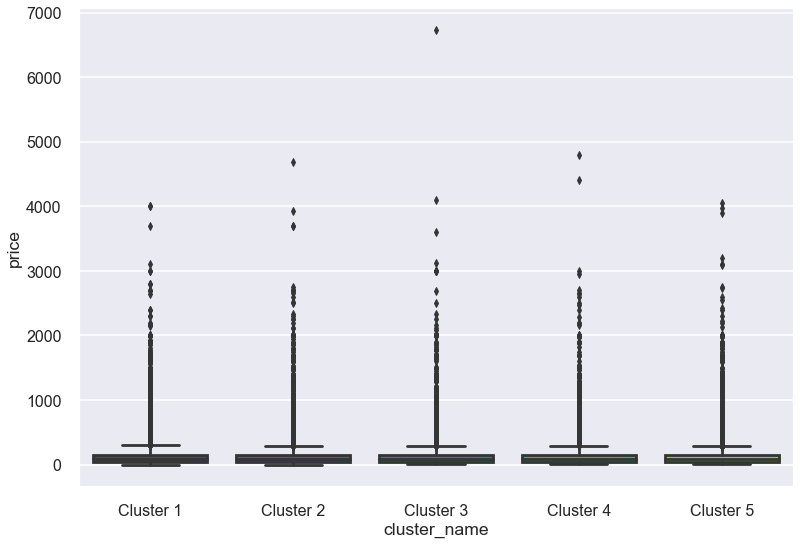

In [74]:
ax = sns.boxplot(y = 'price',
                 x = 'cluster_name',
                 data = cluster_tsne_profile,
                 palette = 'viridis',
                 order=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.show()

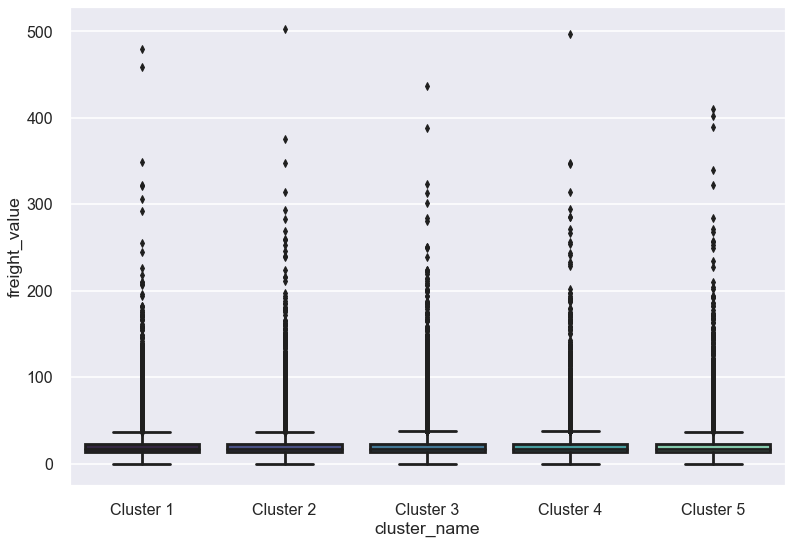

In [73]:
#fig.figsize = (15,8)
#sns.set_theme()

ax = sns.boxplot(y = 'freight_value',
            x = 'cluster_name',
            data = cluster_tsne_profile,
            palette = 'mako',
            order=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
#plt.show()

### Payment type

In [45]:
pmt_type = cluster_tsne_profile[['boleto','credit_card', 'debit_card', 'cluster_name']]
pmt_type.head()

,boleto,credit_card,debit_card,cluster_name
0,0.0,1.0,0.0,Cluster 3
1,1.0,0.0,0.0,Cluster 1
2,0.0,3.0,0.0,Cluster 4
3,0.0,1.0,0.0,Cluster 1
4,0.0,1.0,0.0,Cluster 5


In [46]:
pmt_type.groupby('cluster_name').sum()

,boleto,credit_card,debit_card
cluster_name,,,
Cluster 1,3220.0,45053.0,259.0
Cluster 2,3124.0,44211.0,234.0
Cluster 3,3614.0,49205.0,267.0
Cluster 4,2724.0,37906.0,235.0
Cluster 5,3035.0,42701.0,217.0


Não há diferença entre grupos em relação a tipo de pagamento.

### Região

In [47]:
df_regiao = cluster_tsne_profile[['customer_region_centro_oeste',
                              'customer_region_nordeste',
                              'customer_region_norte',
                              'customer_region_sudeste',
                              'customer_region_sul',
                              'cluster_name']]

KeyError: "['customer_region_sudeste', 'customer_region_centro_oeste', 'customer_region_nordeste', 'customer_region_sul', 'customer_region_norte'] not in index"

In [ ]:
df_regiao.head()

In [ ]:
regiao_grouped = df_regiao.groupby('cluster_name').sum()
regiao_grouped

In [ ]:
regiao_grouped.idxmax(axis=1)

#### Capital

In [76]:
capital_prop_1 = cluster_1['customer_capital'].value_counts(normalize=True).reset_index().rename(columns = {'customer_capital': 'percent',
                                                                                                   'index':'customer_capital'})
capital_prop_1['Cluster'] = 'Cluster 1'

capital_prop_2 = cluster_2['customer_capital'].value_counts(normalize=True).reset_index().rename(columns = {'customer_capital': 'percent',
                                                                                                   'index':'customer_capital'})
capital_prop_2['Cluster'] = 'Cluster 2'

capital_prop_3 = cluster_3['customer_capital'].value_counts(normalize=True).reset_index().rename(columns = {'customer_capital': 'percent',
                                                                                                   'index':'customer_capital'})
capital_prop_3['Cluster'] = 'Cluster 3'

capital_prop_4 = cluster_4['customer_capital'].value_counts(normalize=True).reset_index().rename(columns = {'customer_capital': 'percent',
                                                                                                   'index':'customer_capital'})
capital_prop_4['Cluster'] = 'Cluster 4'

capital_prop_5 = cluster_5['customer_capital'].value_counts(normalize=True).reset_index().rename(columns = {'customer_capital': 'percent',
                                                                                                   'index':'customer_capital'})
capital_prop_5['Cluster'] = 'Cluster 5'

capital_prop = pd.concat([capital_prop_1,capital_prop_2, capital_prop_3, capital_prop_4, capital_prop_4])
capital_prop

,customer_capital,percent,Cluster
0,0,0.623333,Cluster 1
1,1,0.376667,Cluster 1
0,0,0.633681,Cluster 2
1,1,0.366319,Cluster 2
0,0,0.629734,Cluster 3
1,1,0.370266,Cluster 3
0,0,0.628919,Cluster 4
1,1,0.371081,Cluster 4
0,0,0.628919,Cluster 4
1,1,0.371081,Cluster 4


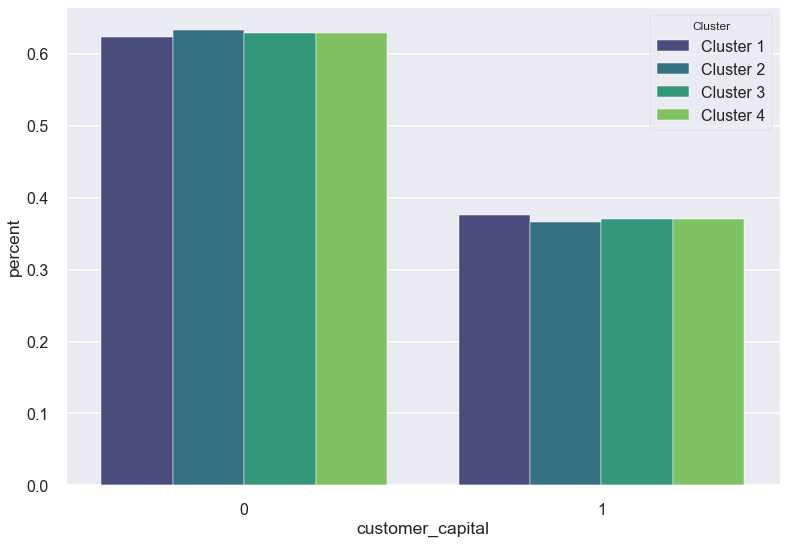

In [77]:
#Plot capital

sns.barplot(x='customer_capital',
            y = 'percent',
            hue = 'Cluster',
            data = capital_prop,
            palette = 'viridis')
plt.show()

### Categoria de Produtos

In [78]:
categ_prod = cluster_tsne_profile[['product_category_name_bebes',
'product_category_name_beleza_saude',
'product_category_name_brinquedos',
'product_category_name_cama_mesa_banho',
'product_category_name_consoles_games',
'product_category_name_construcao_ferramentas_construcao',
'product_category_name_cool_stuff',
'product_category_name_eletrodomesticos',
'product_category_name_eletronicos',
'product_category_name_eletroportateis',
'product_category_name_esporte_lazer',
'product_category_name_fashion_bolsas_e_acessorios',
'product_category_name_ferramentas_jardim',
'product_category_name_informatica_acessorios',
'product_category_name_instrumentos_musicais',
'product_category_name_livros_interesse_geral',
'product_category_name_malas_acessorios',
'product_category_name_moveis_decoracao',
'product_category_name_moveis_escritorio',
'product_category_name_no info',
'product_category_name_papelaria',
'product_category_name_perfumaria',
'product_category_name_pet_shop',
'product_category_name_relogios_presentes',
'product_category_name_telefonia',
'product_category_name_utilidades_domesticas',
'cluster_name']]

In [79]:
categ_grouped = categ_prod.groupby('cluster_name').sum()
categ_grouped

,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_cool_stuff,product_category_name_eletrodomesticos,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_ferramentas_jardim,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_livros_interesse_geral,product_category_name_malas_acessorios,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_no info,product_category_name_papelaria,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas
cluster_name,,,,,,,,,,,,,,,,,,,,,,,,,,
Cluster 1,504.0,1493.0,681.0,1730.0,183.0,131.0,637.0,135.0,472.0,107.0,1392.0,353.0,583.0,1206.0,94.0,91.0,184.0,1188.0,223.0,247.0,402.0,566.0,321.0,981.0,703.0,1018.0
Cluster 2,471.0,1559.0,673.0,1698.0,165.0,129.0,577.0,150.0,432.0,99.0,1361.0,303.0,651.0,1139.0,99.0,83.0,191.0,1112.0,203.0,234.0,438.0,553.0,317.0,964.0,678.0,1044.0
Cluster 3,537.0,1711.0,741.0,1901.0,186.0,142.0,741.0,147.0,486.0,126.0,1511.0,398.0,710.0,1267.0,111.0,113.0,200.0,1274.0,228.0,301.0,457.0,623.0,330.0,1081.0,798.0,1167.0
Cluster 4,440.0,1343.0,573.0,1461.0,151.0,112.0,539.0,93.0,383.0,102.0,1146.0,294.0,536.0,1042.0,112.0,92.0,165.0,959.0,183.0,194.0,339.0,478.0,239.0,821.0,624.0,789.0
Cluster 5,476.0,1503.0,675.0,1677.0,166.0,127.0,572.0,141.0,389.0,108.0,1247.0,317.0,553.0,1136.0,115.0,84.0,168.0,1103.0,184.0,241.0,397.0,533.0,306.0,970.0,682.0,1015.0


In [80]:
categ_grouped.idxmax(axis=1)

cluster_name
Cluster 1    product_category_name_cama_mesa_banho
Cluster 2    product_category_name_cama_mesa_banho
Cluster 3    product_category_name_cama_mesa_banho
Cluster 4    product_category_name_cama_mesa_banho
Cluster 5    product_category_name_cama_mesa_banho
dtype: object

### Tempo de entrega

In [81]:
time_delivered = cluster_tsne_profile[['diff_approved', 
                                   'diff_carrier',
                                   'diff_customer',
                                   'diff_estimate',
                                   'diff_est_del',
                                   'cluster_name']]

time_delivered.head()

,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,cluster_name
0,0.007431,2.373924,8.436574,15.544063,7.107488,Cluster 3
1,1.279745,1.742627,13.782037,19.137766,5.355729,Cluster 1
2,0.011505,0.216100,9.394213,26.639711,17.245498,Cluster 4
3,0.012419,3.758252,13.208750,26.188819,12.980069,Cluster 1
4,0.042940,0.936053,2.873877,12.112049,9.238171,Cluster 5


In [82]:
time_del_grouped = time_delivered.groupby('cluster_name').mean().reset_index()
time_del_grouped

,cluster_name,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del
0,Cluster 1,0.429122,3.177122,12.388946,23.759382,11.370437
1,Cluster 2,0.427987,3.232914,12.428791,23.778383,11.349592
2,Cluster 3,0.424387,3.134120,12.395703,23.690706,11.295002
3,Cluster 4,0.422605,3.155899,12.324463,23.774532,11.450069
4,Cluster 5,0.425465,3.189857,12.397503,23.746755,11.349252


In [83]:
tidy_time_del_grouped = time_del_grouped.melt(id_vars='cluster_name').rename(columns=str.title)
tidy_time_del_grouped

,Cluster_Name,Variable,Value
0,Cluster 1,diff_approved,0.429122
1,Cluster 2,diff_approved,0.427987
2,Cluster 3,diff_approved,0.424387
3,Cluster 4,diff_approved,0.422605
4,Cluster 5,diff_approved,0.425465
5,Cluster 1,diff_carrier,3.177122
6,Cluster 2,diff_carrier,3.232914
7,Cluster 3,diff_carrier,3.134120
8,Cluster 4,diff_carrier,3.155899
9,Cluster 5,diff_carrier,3.189857


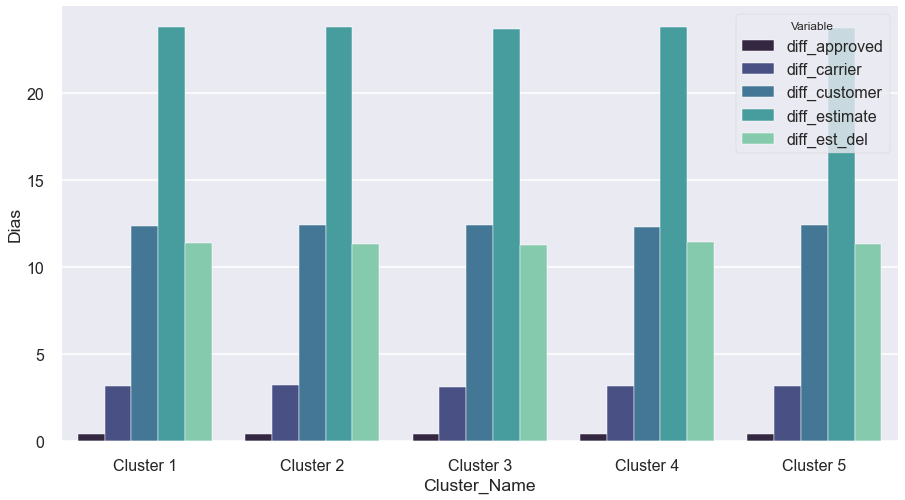

In [86]:
ax = fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x='Cluster_Name', 
                 y='Value', 
                 hue='Variable', 
                 data=tidy_time_del_grouped, 
                 ax=ax,
                 palette = 'mako',
                 order = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
ax.set_ylabel('Dias')
sns.despine(fig)